In [1]:
import numpy as np

In [2]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings('ignore')

In [3]:
## Importing Important Libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from  sklearn.metrics import confusion_matrix, classification_report ,accuracy_score


pd.set_option('max_columns',None)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('customer.csv')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df1=df._get_numeric_data()

In [7]:
df1

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


observation --here these 3 are numeric data bu using plot we will check continuous or numeric accordingly we will remove outlier in data preprocessing stage 

In [8]:
df1['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

o-this is categorial column 

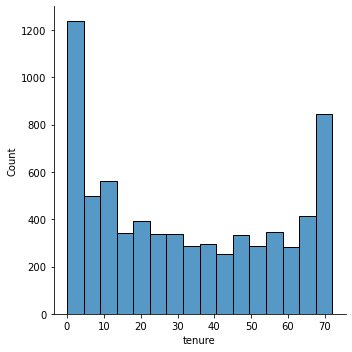

In [9]:
sns.displot(df1['tenure'])

o-- Data is not equally distributed

In [11]:
df1['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='tenure'>

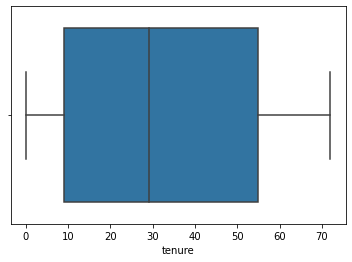

In [12]:
sns.boxplot(df1['tenure'])

O-- In this column outlier is not present

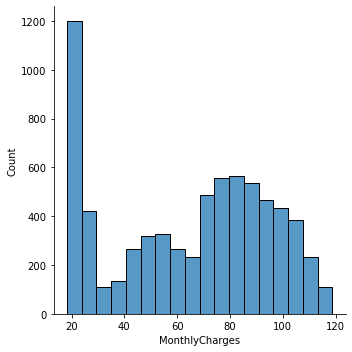

In [12]:
sns.displot(df1['MonthlyCharges'])

O-- Data is not equally distributed

<AxesSubplot:xlabel='MonthlyCharges'>

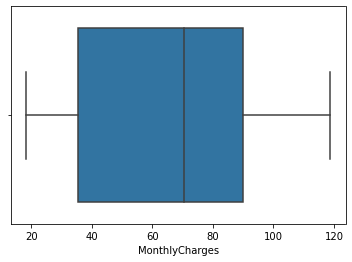

In [13]:
sns.boxplot(df1['MonthlyCharges'])

O==In this column outlier is not present

In [14]:
num_retain = df[df.Churn == 'No'].shape[0]
num_churn = df[df.Churn == 'Yes'].shape[0]

print(num_retain/(num_retain+num_churn)*100,'% of custermer stayed')
print(num_churn/(num_retain+num_churn)*100,'% of custermer left')

73.4630129206304 % of custermer stayed
26.536987079369588 % of custermer left


o--from above this we can assume that class having imbalance issue

In [15]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ': ' +str())
        print(df[column].value_counts())
        print('\n')

customerID: 
0730-KOAVE    1
0607-DAAHE    1
5376-DEQCP    1
6128-AQBMT    1
9167-APMXZ    1
             ..
3780-DDGSE    1
2482-CZGBB    1
7619-ODSGN    1
9415-TPKRV    1
3863-IUBJR    1
Name: customerID, Length: 7043, dtype: int64


gender: 
Male      3555
Female    3488
Name: gender, dtype: int64


Partner: 
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents: 
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService: 
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines: 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService: 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity: 
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup: 
No                     3088
Yes                    2429
No internet service    1526
Name: On

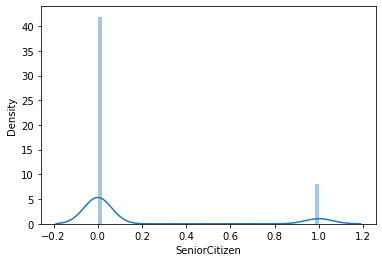

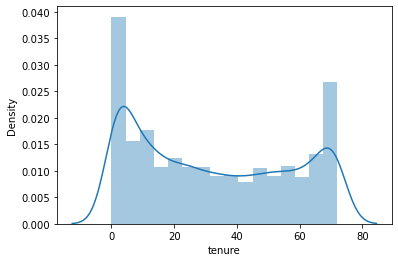

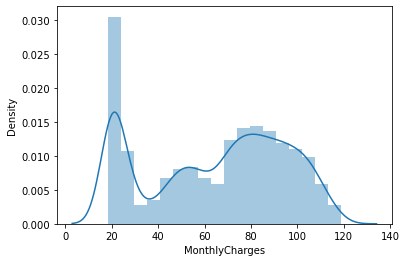

In [16]:
d=df.columns
for i in d:
    if df[i].dtypes!='object':
        sns.distplot(df[i])
        plt.show()

O-->SeniourCitizen , tenure,MonthlyCharges data are not equally distributed

In [17]:
d=df.columns
for i in d:
    if df[i].dtypes=="object":
        print(df[i].head(0))

Series([], Name: customerID, dtype: object)
Series([], Name: gender, dtype: object)
Series([], Name: Partner, dtype: object)
Series([], Name: Dependents, dtype: object)
Series([], Name: PhoneService, dtype: object)
Series([], Name: MultipleLines, dtype: object)
Series([], Name: InternetService, dtype: object)
Series([], Name: OnlineSecurity, dtype: object)
Series([], Name: OnlineBackup, dtype: object)
Series([], Name: DeviceProtection, dtype: object)
Series([], Name: TechSupport, dtype: object)
Series([], Name: StreamingTV, dtype: object)
Series([], Name: StreamingMovies, dtype: object)
Series([], Name: Contract, dtype: object)
Series([], Name: PaperlessBilling, dtype: object)
Series([], Name: PaymentMethod, dtype: object)
Series([], Name: TotalCharges, dtype: object)
Series([], Name: Churn, dtype: object)


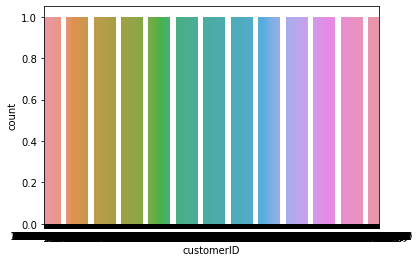

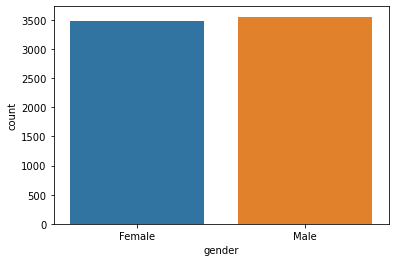

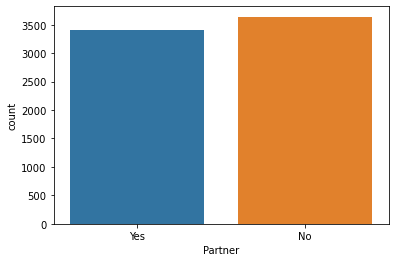

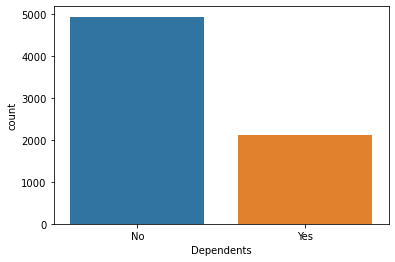

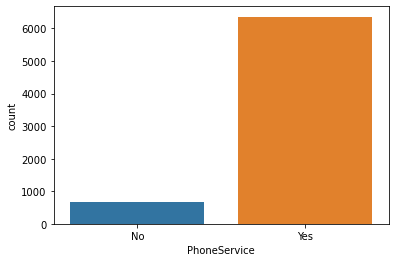

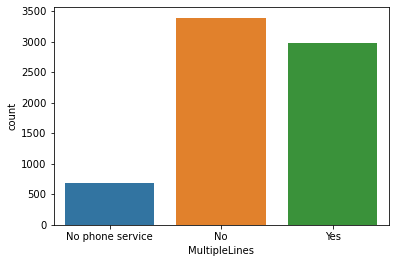

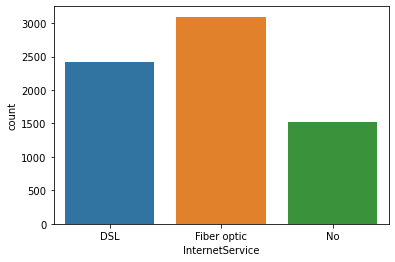

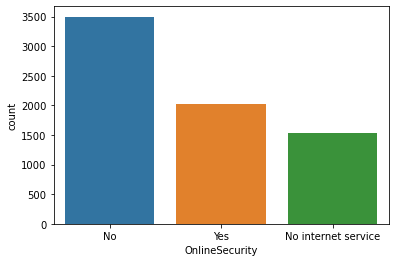

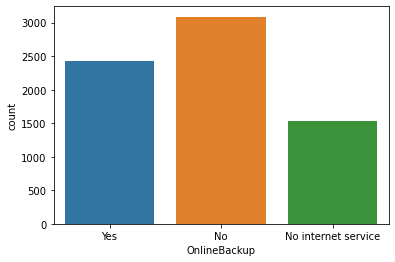

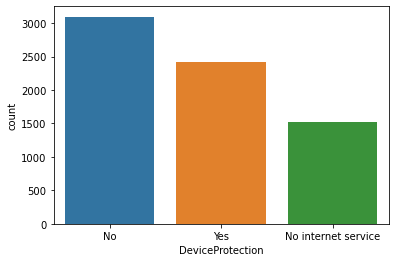

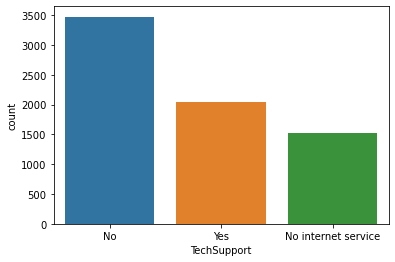

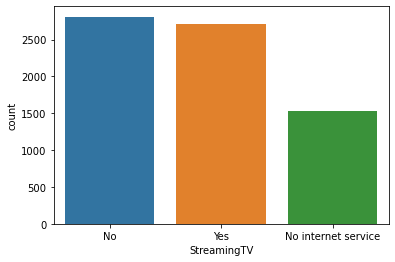

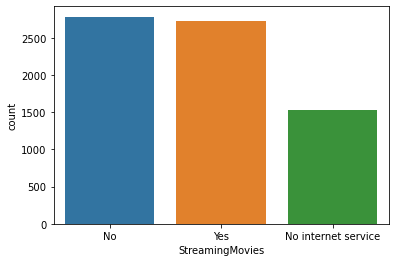

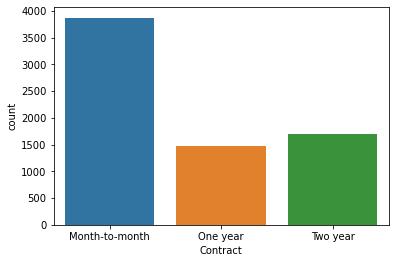

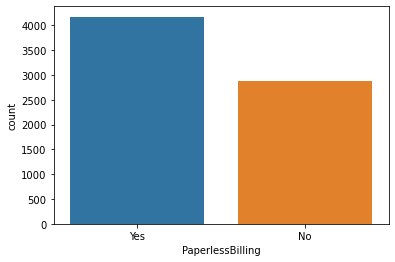

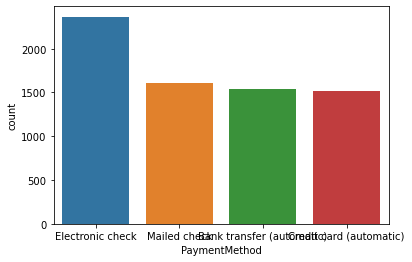

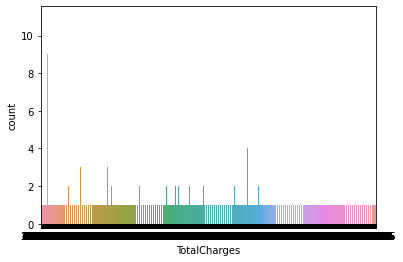

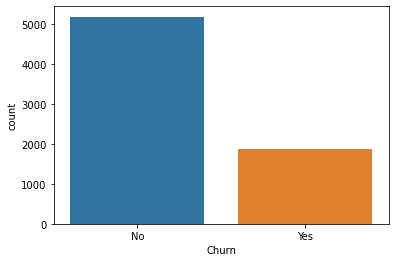

In [18]:
d=df.columns
for i in d:
    if df[i].dtypes=="object":
       sns.countplot(df[i])
       plt.show()

customerID,------categorial columns, frequency of data equallyt distributed
gender----------categorial columns, frequency of data equallyt distributed
Partner-categorial columns, frequency of data  not equallyt distributed
Dependents==categorial columns, frequency of data  not equallyt distributed
 PhoneService--categorial columns, frequency of data  not equallyt distributed
MultipleLines--categorial columns, frequency of data not  equallyt distributed
InternetService---categorial columns, frequency of data  not equallyt distributed
OnlineSecurity--categorial columns, frequency of data  not equallyt distributed
OnlineBackup--categorial columns, frequency of data not  equallyt distributed
DeviceProtection--categorial columns, frequency of data not  equallyt distributed
TechSupport--categorial columns, frequency of data  not equallyt distributed
StreamingTV--categorial columns, frequency of data not equallyt distributed
StreamingMovies--categorial columns, frequency of data not  equallyt distributed
Contract--categorial columns, frequency of data not  equallyt distributed
PaperlessBilling--categorial columns, frequency of not  data equallyt distributed
PaymentMethod--categorial columns, frequency of data  not equallyt distributed
TotalCharges--categorial columns, frequency of  not data equallyt distributed
Churn--categorial columns, frequency of  not data equallyt distributed

In [10]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [27]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# bivariate analysis:

In [35]:
dfcor=df.corr()

In [36]:
dfcor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

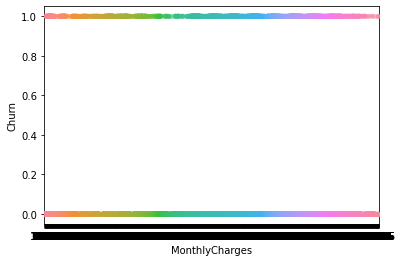

In [37]:
sns.stripplot(  x='MonthlyCharges', y='Churn' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  of respect to churn they are not highly correlated  but both are having positive correlationship

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Churn'>

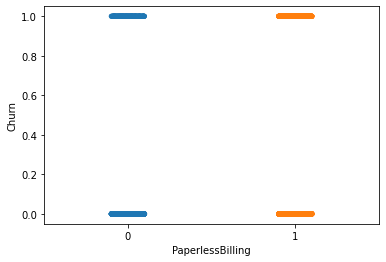

In [38]:
sns.stripplot(  x='PaperlessBilling', y='Churn' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  of respect to churn they are not highly correlated  but both are having positive correlationship

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

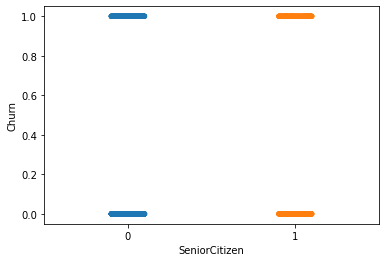

In [39]:
sns.stripplot(  x='SeniorCitizen', y='Churn' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  of respect to churn they are not highly correlated  but both are having positive correlationship

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn'>

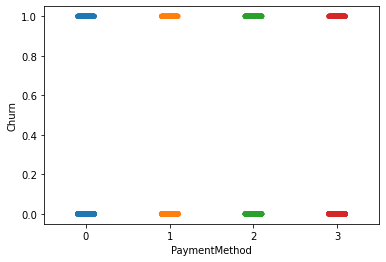

In [45]:
sns.stripplot(  x='PaymentMethod', y='Churn' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  of respect to churn they are not highly correlated  but both are having positive correlationship

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

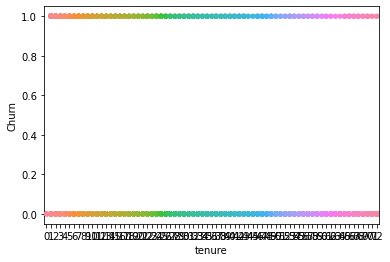

In [41]:
sns.stripplot(  x='tenure', y='Churn' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  of respect to churn they are not highly correlated  but both are having negative correlationship

<AxesSubplot:xlabel='Contract', ylabel='Churn'>

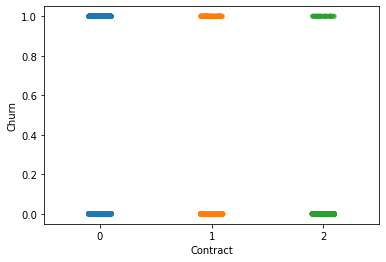

In [42]:
sns.stripplot(  x='Contract', y='Churn' ,alpha=0.5 ,c=(0,0,1) , data=df)

Observation - we plotted stripplot  of respect to churn they are not highly correlated  but both are having negative correlationship

Multivariate Analysis

In [28]:
dfcor=df.corr()

<AxesSubplot:>

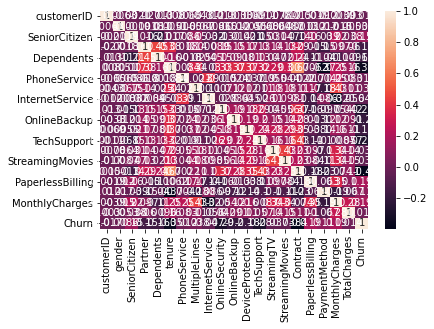

In [16]:
sns.heatmap(dfcor, annot=True)

O--->we checked the colour where it is lighter corresponding to that point we will get value of x and y . x nd y are two different column and that poing having non linearity and where value is near to 1 and colur is darker we found high correlation 

<AxesSubplot:>

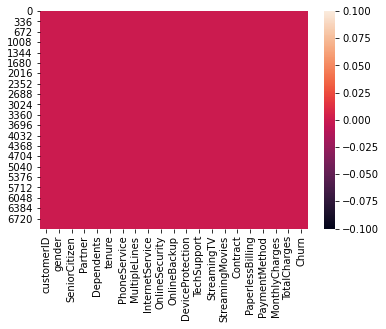

In [17]:
sns.heatmap(df.isnull())

In [ ]:
O--->we found there is no null value in df , sns heatmap showing the same

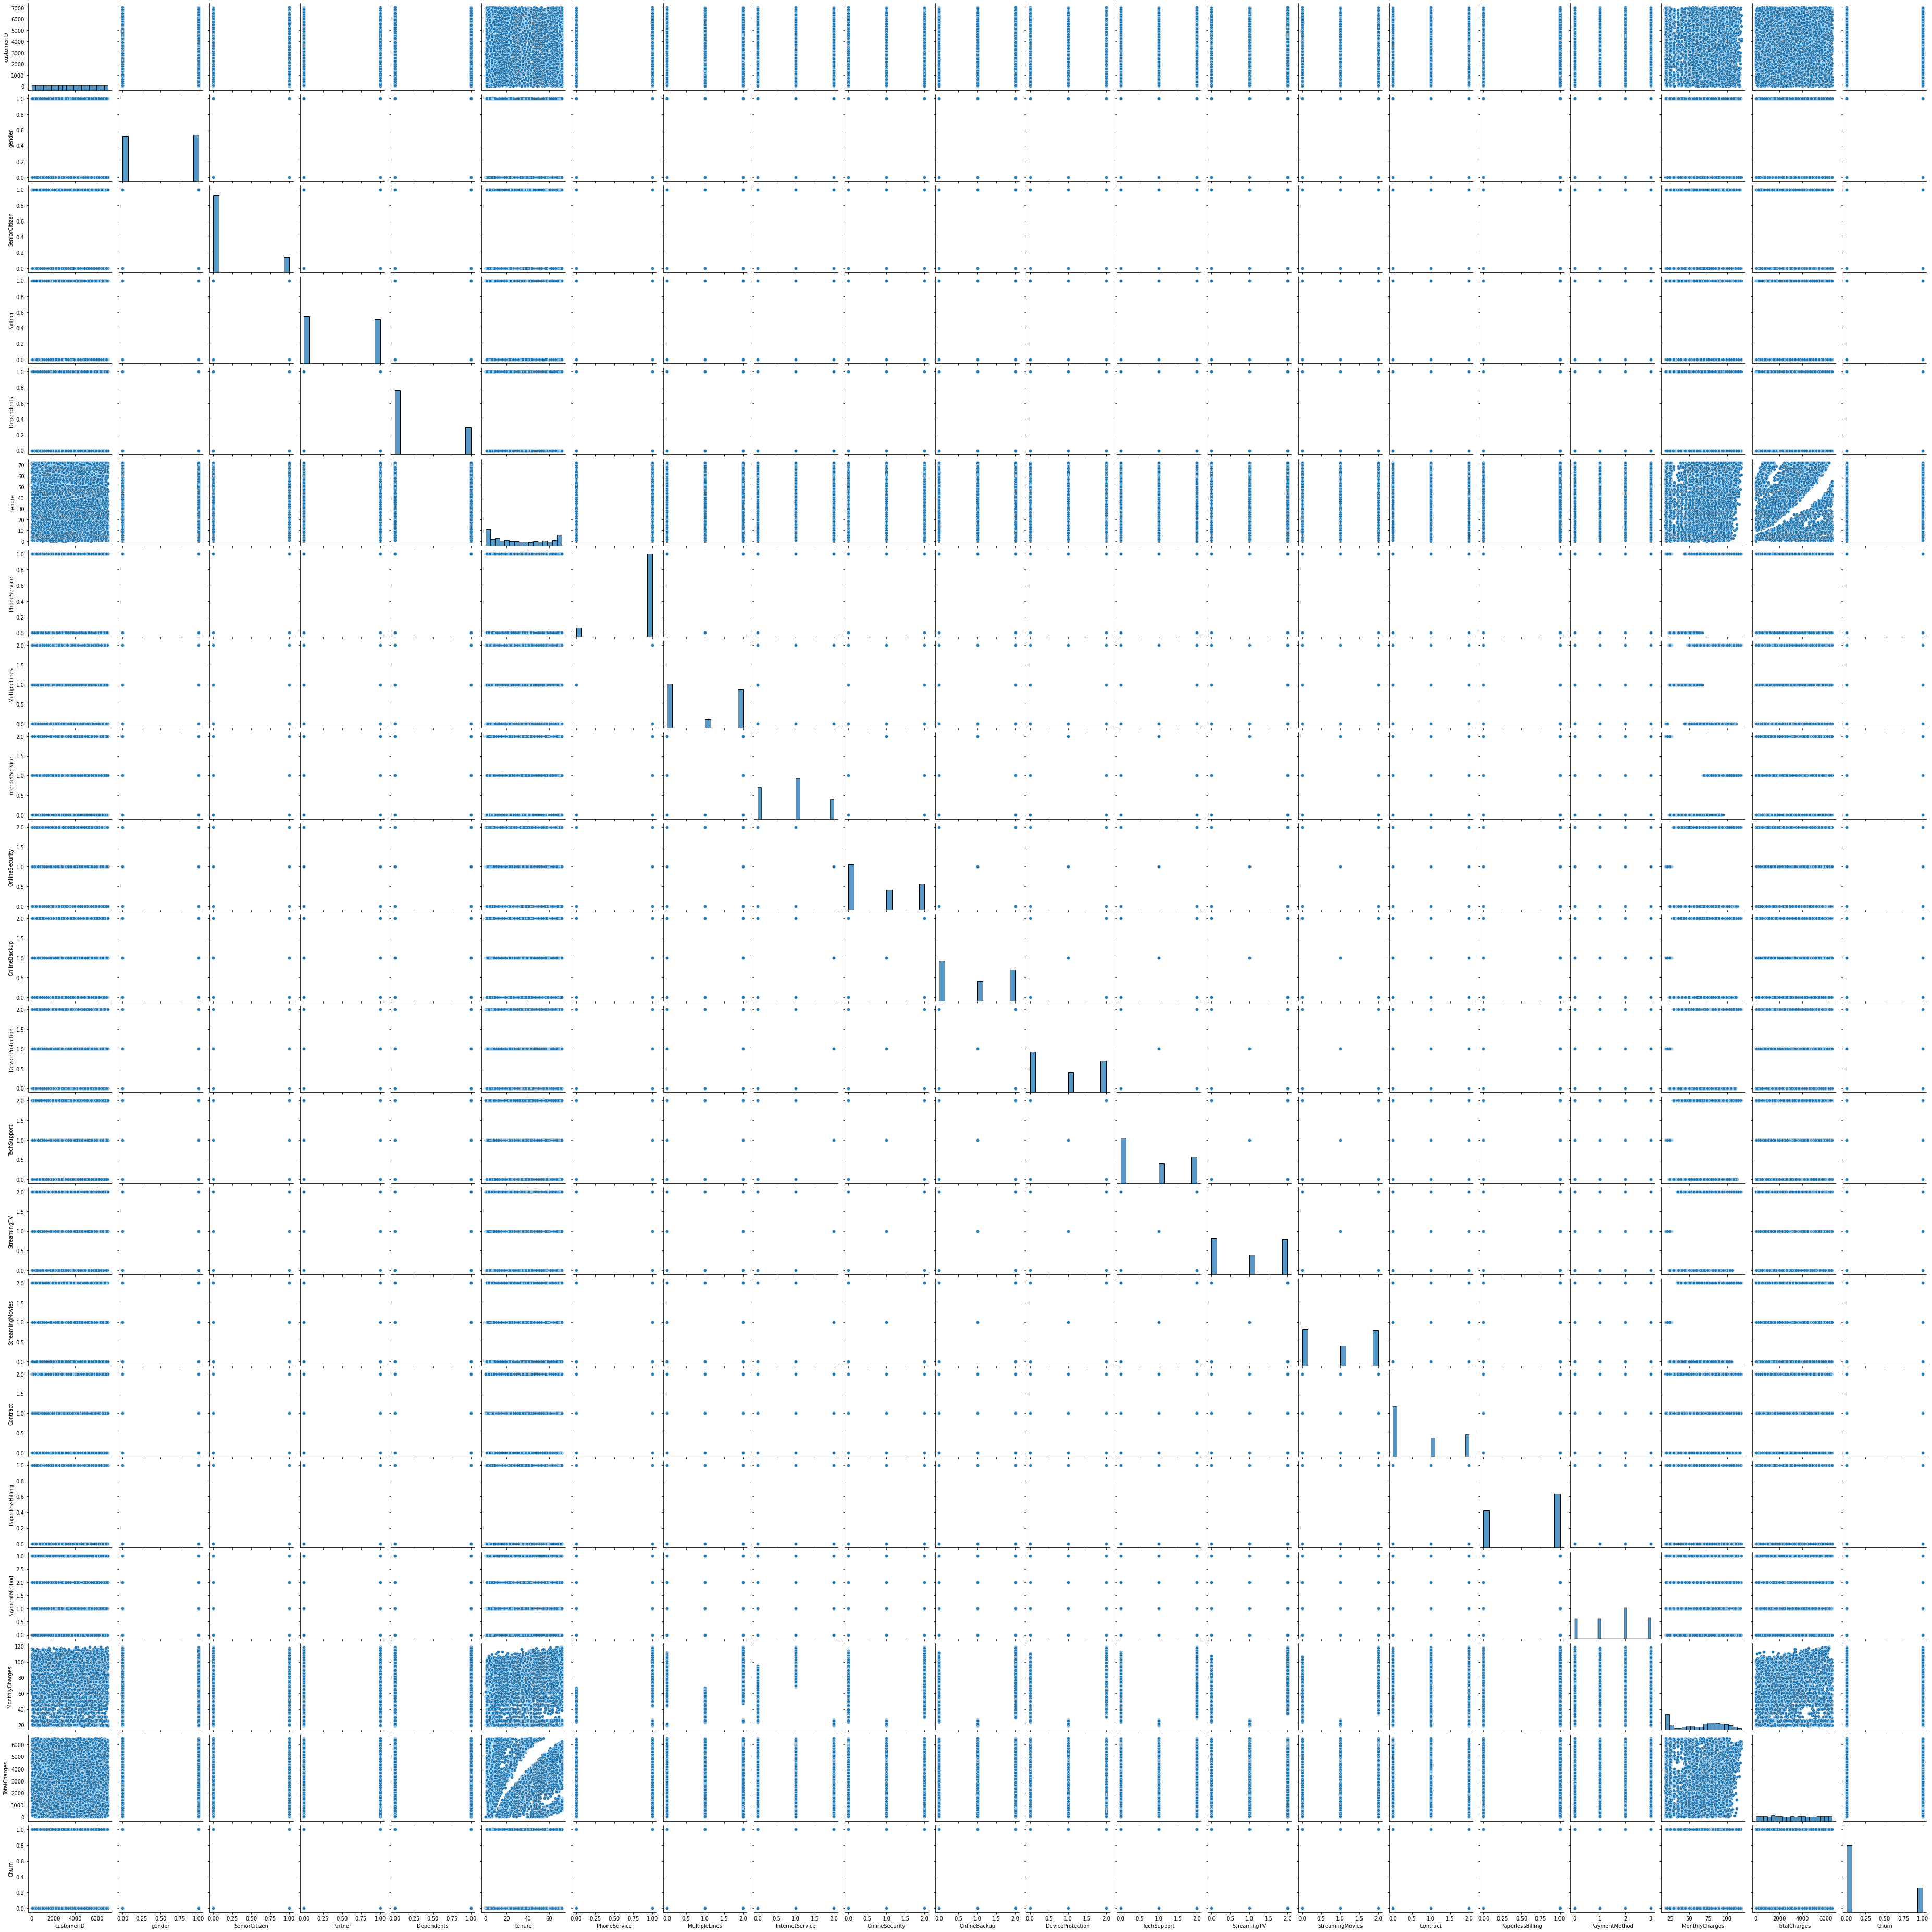

In [43]:
sns.pairplot(df)

O-->for graphical view of multivatiate  analysis we plotted pairplot ,l we seen the data distribution

In [18]:
df1.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

we found only SeniorCitizen      is having skew which categorical so we canm not remove the skew, othrer two numerical data neither having skew or nor outlier

# As we seen earlier label having class imbalance issue we are making it balanced using over sampling

In [26]:
!pip install imblearn

In [12]:
x = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

In [13]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [14]:
x1,y1=sm.fit_resample(x,y)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1, test_size=.22  , random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes  import   MultinomialNB
from  sklearn.svm import SVC
from sklearn.tree  import DecisionTreeClassifier
from  sklearn.neighbors  import KNeighborsClassifier
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import  RandomForestClassifier

from  sklearn.metrics import confusion_matrix, classification_report ,accuracy_score

In [17]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)




print('acc',accuracy_score(y_test,predlg))
print("confusion matrix", confusion_matrix(y_test,predlg))
print("clasification report",classification_report(y_test,predlg))  

acc 0.8190601668862538
confusion matrix [[880 256]
 [156 985]]
clasification report               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1136
           1       0.79      0.86      0.83      1141

    accuracy                           0.82      2277
   macro avg       0.82      0.82      0.82      2277
weighted avg       0.82      0.82      0.82      2277



In [18]:
ad=AdaBoostClassifier( n_estimators=50)
ad.fit(x_train, y_train)
adprd=ad.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,adprd))
print(confusion_matrix(y_test, adprd))
print(classification_report(y_test,adprd))

Accuracy score is 0.8383838383838383
[[916 220]
 [148 993]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1136
           1       0.82      0.87      0.84      1141

    accuracy                           0.84      2277
   macro avg       0.84      0.84      0.84      2277
weighted avg       0.84      0.84      0.84      2277



In [20]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(x_train, y_train.ravel()) 
predsvc=clf.predict(x_test)

print("acccuracy score" , accuracy_score(y_test,predsvc))
print("confusion matrix", confusion_matrix(y_test,predsvc))
print("clasification report",classification_report(y_test,predsvc))

   
    

acccuracy score 0.7325428194993412
confusion matrix [[954 182]
 [427 714]]
clasification report               precision    recall  f1-score   support

           0       0.69      0.84      0.76      1136
           1       0.80      0.63      0.70      1141

    accuracy                           0.73      2277
   macro avg       0.74      0.73      0.73      2277
weighted avg       0.74      0.73      0.73      2277



In [37]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("acccuracy score" , accuracy_score(y_test,preddtc))
print("confusion matrix", confusion_matrix(y_test,preddtc))
print("clasification report",classification_report(y_test,preddtc))  

acccuracy score 0.7856829161176987
confusion matrix [[897 239]
 [249 892]]
clasification report               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1136
           1       0.79      0.78      0.79      1141

    accuracy                           0.79      2277
   macro avg       0.79      0.79      0.79      2277
weighted avg       0.79      0.79      0.79      2277



In [39]:
rvc=RandomForestClassifier()
rvc.fit(x_train,y_train)
predrvc=rvc.predict(x_test)
print("acccuracy score" , accuracy_score(y_test,preddtc))
print("confusion matrix", confusion_matrix(y_test,preddtc))
print("clasification report",classification_report(y_test,preddtc))  

acccuracy score 0.7856829161176987
confusion matrix [[897 239]
 [249 892]]
clasification report               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1136
           1       0.79      0.78      0.79      1141

    accuracy                           0.79      2277
   macro avg       0.79      0.79      0.79      2277
weighted avg       0.79      0.79      0.79      2277



In [46]:
kmn=KNeighborsClassifier(n_neighbors=5)
kmn.fit(x_train, y_train)
kmnpred=kmn.predict(x_test)
print("accuracy score is",accuracy_score(y_test,kmnpred))
print("confusion matrix", confusion_matrix(y_test,kmnpred))
print("classification report",classification_report(y_test,kmnpred))



accuracy score is 0.6701800614844093
confusion matrix [[660 476]
 [275 866]]
classification report               precision    recall  f1-score   support

           0       0.71      0.58      0.64      1136
           1       0.65      0.76      0.70      1141

    accuracy                           0.67      2277
   macro avg       0.68      0.67      0.67      2277
weighted avg       0.68      0.67      0.67      2277



In [44]:
from sklearn.model_selection import cross_val_score

In [ ]:
print(cross_val_score(ad,x,y,cv=5).mean())

In [43]:
print(cross_val_score(rvc,x,y,cv=5).mean())

0.793554826117814


In [46]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.72738896461062


In [47]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.8003697819214143


In [21]:
print(cross_val_score(clf,x,y,cv=5).mean())

0.6557923091812375


Best model   Is randomForestClassifier it is having less difference accuracy score and cross_val_score

# Hyper parameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameter= {'n_estimators':[2,4,6,8],
           'criterion':['gini', 'entropy']  , 'max_depth':np.arange(2,20)}

In [30]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'n_estimators': [2, 4, 6, 8]})

In [31]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 8}

In [33]:
Finalmodel=RandomForestClassifier(n_estimators=8, max_depth=15, random_state=0,criterion='entropy')
Finalmodel.fit(x_train, y_train)

scores = cross_val_score(Finalmodel, x, y, cv=5)
R2score=scores.mean()

print(R2score*100)

78.17705981031034


In [44]:
import joblib
joblib.dump(Finalmodel,"customerchurnprediction.pkl")

['customerchurnprediction.pkl']